1) Import Libraries and Dataset.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_excel('Diamonds Dataset.xlsx')

# Display the first 5 rows of the dataframe
df.head(5)

# Reorder the columns
df = df[['price', 'carat', 'color', 'clarity', 'depth', 'x', 'y', 'z', 'table', 'cut']]

# Rename the columns based on the metadata provided
df.rename(columns={'x': 'length (mm)', 'y': 'width (mm)', 'z': 'depth (mm)', 'table': 'table (width_at_top)'}, inplace=True)

# Label encoding for categorical columns to convert them to numerical values and help in visualization later
label_encoder = LabelEncoder()
df['color_encoded'] = label_encoder.fit_transform(df['color'])
df['clarity_encoded'] = label_encoder.fit_transform(df['clarity'])
df['cut_encoded'] = label_encoder.fit_transform(df['cut'])

#arrange the encoded columns to the next of the original columns
df = df[['price', 'carat', 'color', 'color_encoded', 'clarity', 'clarity_encoded', 'depth', 'length (mm)', 'width (mm)', 'depth (mm)', 'table (width_at_top)', 'cut', 'cut_encoded']]

# Display the first 5 rows of the reordered dataframe
df.head(5)

,price,carat,color,color_encoded,clarity,clarity_encoded,depth,length (mm),width (mm),depth (mm),table (width_at_top),cut,cut_encoded
0,326,0.23,E,1,SI2,3,61.5,3.95,3.98,2.43,55.0,Ideal,2
1,326,0.21,E,1,SI1,2,59.8,3.89,3.84,2.31,61.0,Premium,3
2,327,0.23,E,1,VS1,4,56.9,4.05,4.07,2.31,65.0,Good,1
3,334,0.29,I,5,VS2,5,62.4,4.20,4.23,2.63,58.0,Premium,3
4,335,0.31,J,6,SI2,3,63.3,4.34,4.35,2.75,58.0,Good,1


2.b.	Print the description and shape of the dataset.

In [9]:
# Print the description of the dataframe
print(df.describe())

# Print the shape of the dataframe
print("\n shape of the dataframe:", df.shape)

              price         carat  color_encoded  clarity_encoded  \
count  53940.000000  53940.000000   53940.000000     53940.000000   
mean    3932.799722      0.797940       2.594197         3.835150   
std     3989.439738      0.474011       1.701105         1.724591   
min      326.000000      0.200000       0.000000         0.000000   
25%      950.000000      0.400000       1.000000         2.000000   
50%     2401.000000      0.700000       3.000000         4.000000   
75%     5324.250000      1.040000       4.000000         5.000000   
max    18823.000000      5.010000       6.000000         7.000000   

              depth   length (mm)    width (mm)    depth (mm)  \
count  53940.000000  53940.000000  53940.000000  53940.000000   
mean      61.749405      5.731157      5.734526      3.538734   
std        1.432621      1.121761      1.142135      0.705699   
min       43.000000      0.000000      0.000000      0.000000   
25%       61.000000      4.710000      4.720000      

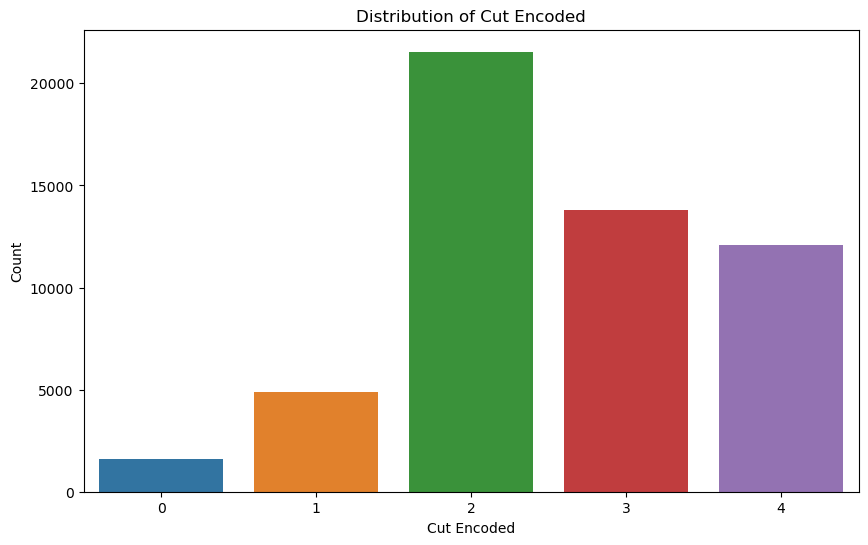

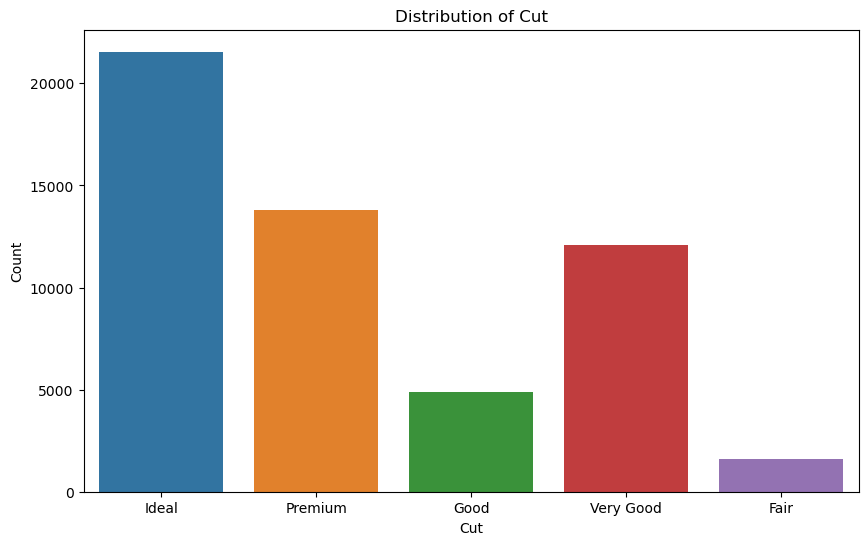

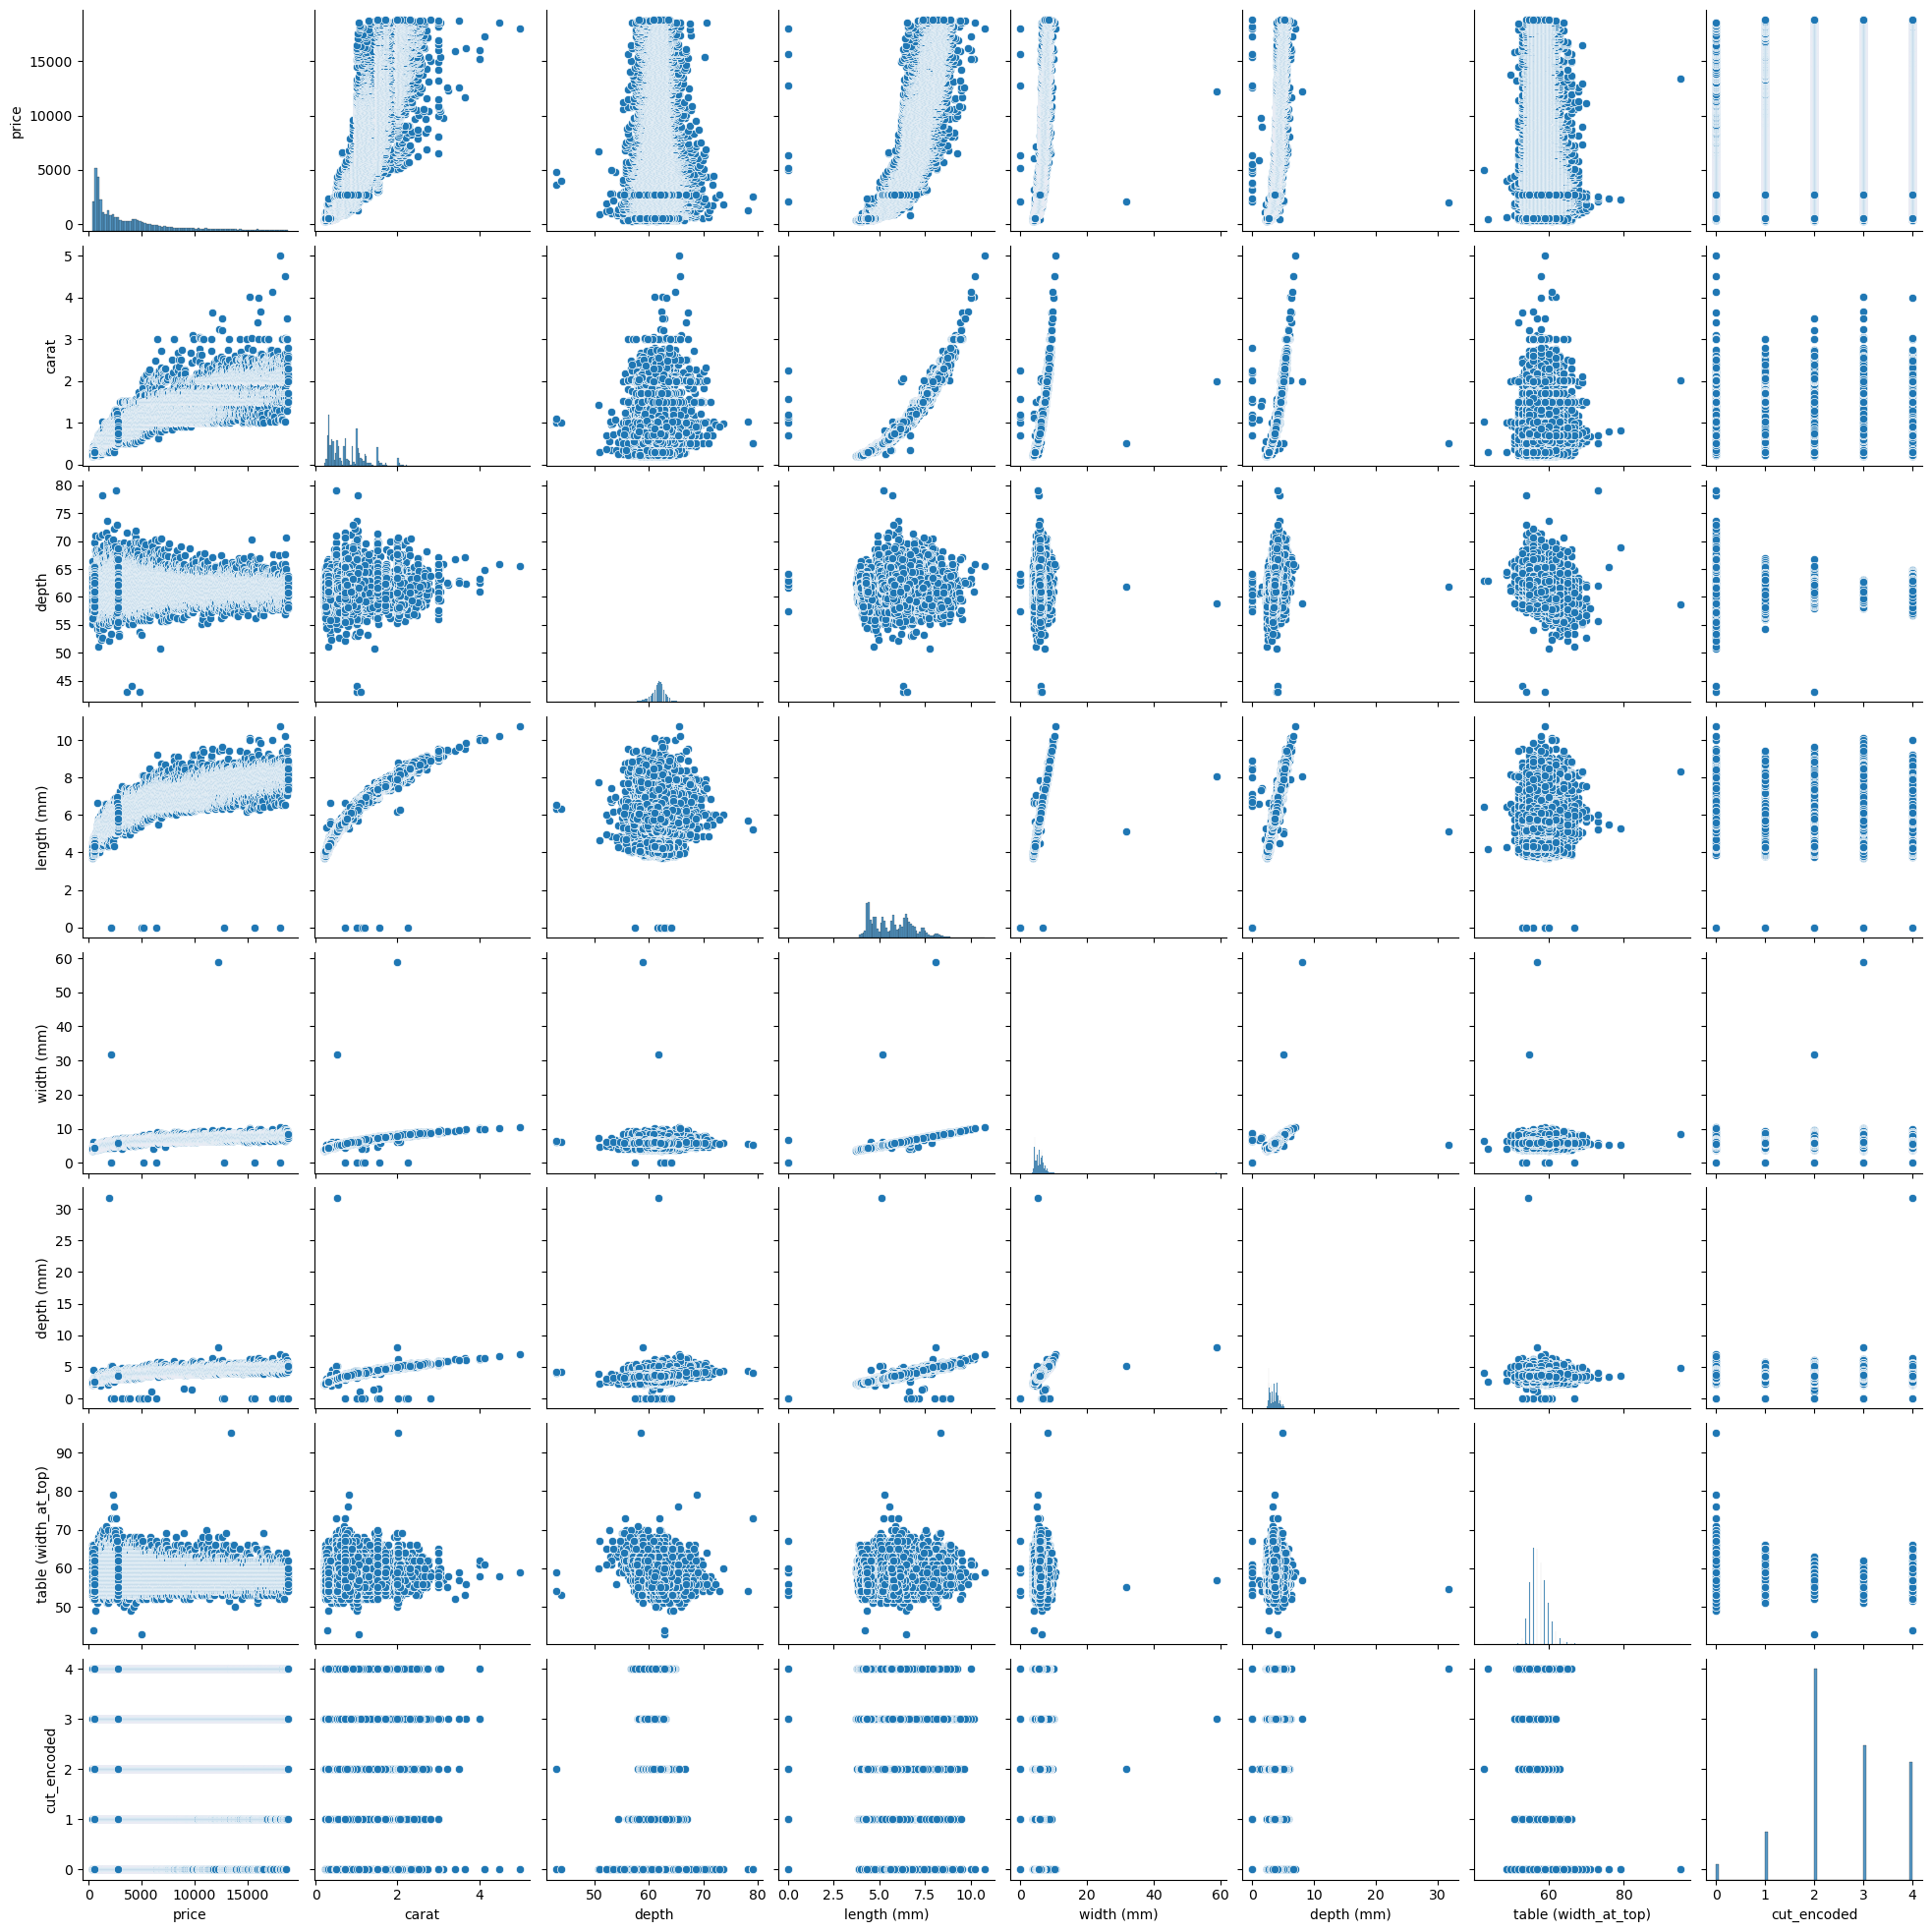

C:\Users\pc\AppData\Local\Temp\ipykernel_12056\93018039.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


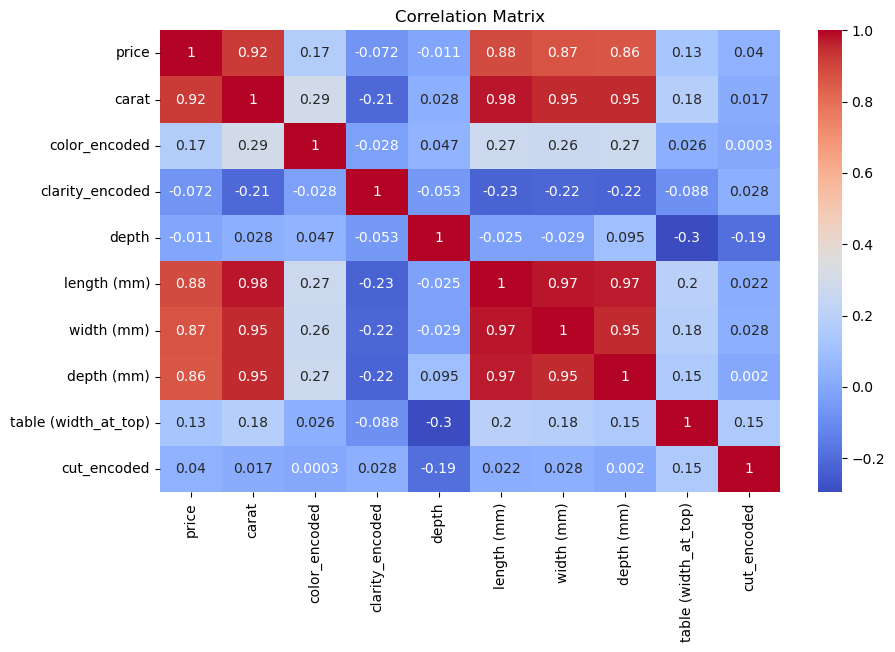

                Feature  Importance
8  table (width_at_top)    0.268861
4                 depth    0.224234
5           length (mm)    0.109276
6            width (mm)    0.105239
0                 price    0.100459
7            depth (mm)    0.068958
1                 carat    0.051299
2         color_encoded    0.037510
3       clarity_encoded    0.034165


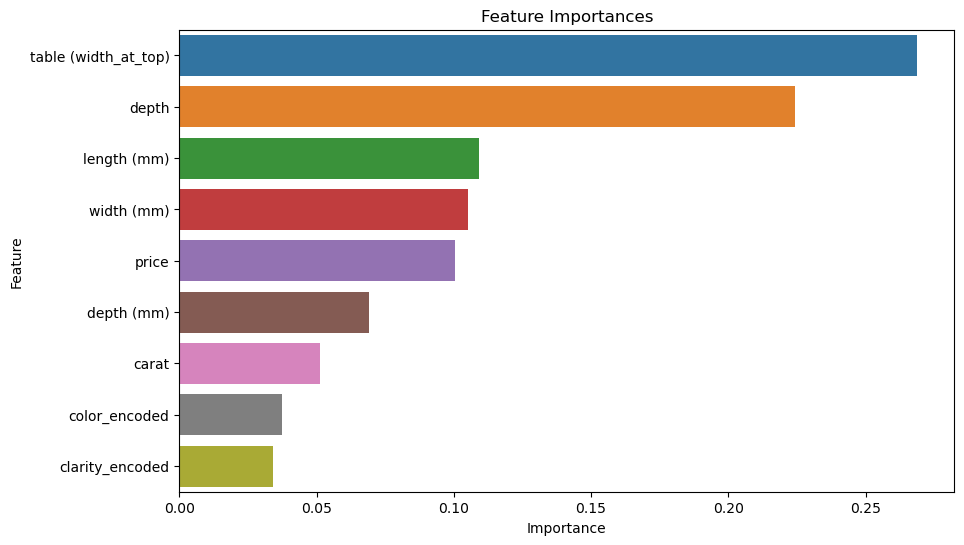

                Feature  Importance  Cumulative Importance
8  table (width_at_top)    0.268861               0.268861
4                 depth    0.224234               0.493094
5           length (mm)    0.109276               0.602370
6            width (mm)    0.105239               0.707609
0                 price    0.100459               0.808068
7            depth (mm)    0.068958               0.877026
1                 carat    0.051299               0.928325
2         color_encoded    0.037510               0.965835
3       clarity_encoded    0.034165               1.000000


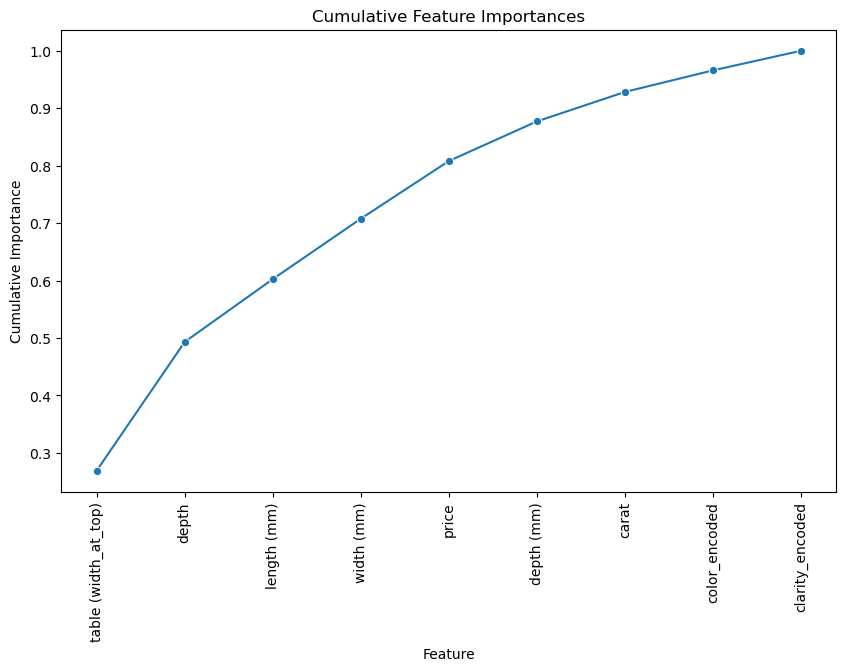

In [10]:
# Distribution of the target variable 'cut_encoded'
from sklearn.ensemble import RandomForestClassifier


plt.figure(figsize=(10, 6))
sns.countplot(x='cut_encoded', data=df)
plt.title('Distribution of Cut Encoded')
plt.xlabel('Cut Encoded')
plt.ylabel('Count')
plt.show()

# Distribution of the target variable 'cut'
plt.figure(figsize=(10, 6))
sns.countplot(x='cut', data=df)
plt.title('Distribution of Cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

# Pairplot to see the relationships between features
sns.pairplot(df[['price', 'carat', 'depth', 'length (mm)', 'width (mm)', 'depth (mm)', 'table (width_at_top)', 'cut_encoded']])
plt.show()

# correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Define the features and target variable
X = df[['price', 'carat', 'color_encoded', 'clarity_encoded', 'depth', 'length (mm)', 'width (mm)', 'depth (mm)', 'table (width_at_top)']]
y = df['cut_encoded']

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Calculate cumulative feature importance
feature_importances['Cumulative Importance'] = feature_importances['Importance'].cumsum()

# Display the cumulative feature importances
print(feature_importances)

# Plot the cumulative feature importances
plt.figure(figsize=(10, 6))
sns.lineplot(x='Feature', y='Cumulative Importance', data=feature_importances, marker='o')
plt.title('Cumulative Feature Importances')
plt.xticks(rotation=90)
plt.show()


As per correlation Matrix to predict cut quality the important feature likely to be imporatant are as below:

- table(width_at_top)
- depth 
- length(mm)
- width(mm)
- price 
- depth(mm)
- carat

We can drop color_encoded and clarity_encoded as there is minor impact of these features.

And so yes - Coorelation analysis have affect on feature selection.

4.	Data Pre-processing and cleaning:

We have already converted categorical columns to numerical ones.

In [11]:
# Drop 'color_encoded' and 'clarity_encoded' from the dataframe
df_selected = df.drop(columns=['color_encoded', 'clarity_encoded'])

# Display the first 5 rows of the new dataframe
df_selected.head(5)

# identify null values
print(df_selected.isnull().sum()) # no null values

# Remove outliers using IQR method
Q1 = df_selected[['price', 'carat', 'depth', 'length (mm)', 'width (mm)', 'depth (mm)', 'table (width_at_top)']].quantile(0.25)
Q3 = df_selected[['price', 'carat', 'depth', 'length (mm)', 'width (mm)', 'depth (mm)', 'table (width_at_top)']].quantile(0.75)
IQR = Q3 - Q1

# Define a mask for filtering out the outliers
mask = ~((df_selected[['price', 'carat', 'depth', 'length (mm)', 'width (mm)', 'depth (mm)', 'table (width_at_top)']] < (Q1 - 1.5 * IQR)) | (df[['price', 'carat', 'depth', 'length (mm)', 'width (mm)', 'depth (mm)', 'table (width_at_top)']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to the dataframe
df_selected = df_selected[mask]

# Display the first 5 rows of the dataframe after removing outliers
df_selected.head(5)

price                   0
carat                   0
color                   0
clarity                 0
depth                   0
length (mm)             0
width (mm)              0
depth (mm)              0
table (width_at_top)    0
cut                     0
cut_encoded             0
dtype: int64


,price,carat,color,clarity,depth,length (mm),width (mm),depth (mm),table (width_at_top),cut,cut_encoded
0,326,0.23,E,SI2,61.5,3.95,3.98,2.43,55.0,Ideal,2
1,326,0.21,E,SI1,59.8,3.89,3.84,2.31,61.0,Premium,3
3,334,0.29,I,VS2,62.4,4.20,4.23,2.63,58.0,Premium,3
4,335,0.31,J,SI2,63.3,4.34,4.35,2.75,58.0,Good,1
5,336,0.24,J,VVS2,62.8,3.94,3.96,2.48,57.0,Very Good,4


Normalization vs. Standardization

Normalization scales the data to a range of [0, 1] or [-1, 1]. It is useful when you want to bound your input features. It is sensitive to outliers.

Standardization scales the data to have a mean of 0 and a standard deviation of 1. It is less sensitive to outliers and is generally preferred when the data follows a Gaussian distribution.

Given that I have already handled outliers, standardization is a good choice because it is less sensitive to the remaining data distribution and can handle different scales effectively.

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the selected features
df_selected[['price', 'carat', 'depth', 'length (mm)', 'width (mm)', 'depth (mm)', 'table (width_at_top)']] = scaler.fit_transform(df_selected[['price', 'carat', 'depth', 'length (mm)', 'width (mm)', 'depth (mm)', 'table (width_at_top)']])
df_selected.head(5)

,price,carat,color,clarity,depth,length (mm),width (mm),depth (mm),table (width_at_top),cut,cut_encoded
0,-1.012363,-1.289950,E,SI2,-0.259076,-1.629414,-1.613461,-1.647072,-1.118057,Ideal,2
1,-1.012363,-1.343844,E,SI1,-1.796287,-1.690645,-1.757201,-1.845043,1.849991,Premium,3
3,-1.009454,-1.128269,I,VS2,0.554741,-1.374285,-1.356782,-1.317122,0.365967,Premium,3
4,-1.009090,-1.074375,J,SI2,1.368559,-1.231412,-1.233576,-1.119152,0.365967,Good,1
5,-1.008726,-1.263003,J,VVS2,0.916438,-1.639619,-1.633995,-1.564585,-0.128708,Very Good,4


5.	Model Building 

Logistic Regression Model:

Accuracy of the Logistic Regression model: 68.79423579672257
Classification Report of the Logistic Regression model:
               precision    recall  f1-score   support

           0       0.76      0.20      0.31       112
           1       0.61      0.47      0.53      1189
           2       0.74      0.87      0.80      6715
           3       0.73      0.71      0.72      4044
           4       0.51      0.40      0.45      3623

    accuracy                           0.69     15683
   macro avg       0.67      0.53      0.56     15683
weighted avg       0.67      0.69      0.68     15683

Confusion Matrix of the Logistic Regression model:
 [[  22   56    7   23    4]
 [   6  555  245  110  273]
 [   1    6 5875  358  475]
 [   0    0  489 2870  685]
 [   0  290 1288  578 1467]]


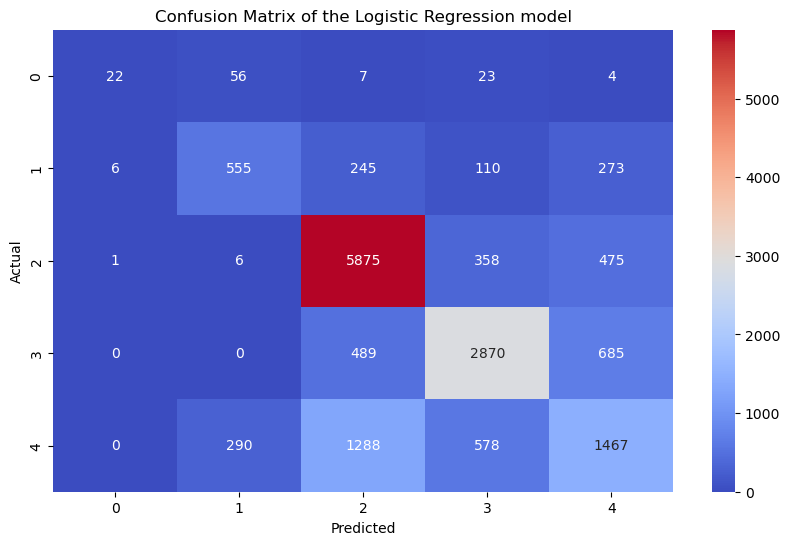

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Define the features and target variable
X = df_selected[['price', 'carat', 'depth', 'length (mm)', 'width (mm)', 'depth (mm)', 'table (width_at_top)']]
y = df_selected['cut_encoded']

# Rename the variables to be specific to logistic regression model
X_logistic = df_selected[['price', 'carat', 'depth', 'length (mm)', 'width (mm)', 'depth (mm)', 'table (width_at_top)']]
y_logistic = df_selected['cut_encoded']

# Split the data into training and testing sets
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.33, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model
logistic_model.fit(X_train_logistic, y_train_logistic)

# Predict the target variable
y_pred_logistic = logistic_model.predict(X_test_logistic)

# Calculate the accuracy of the model
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
print('Accuracy of the Logistic Regression model:', accuracy_logistic*100)

# Print the classification report
print('Classification Report of the Logistic Regression model:\n', classification_report(y_test_logistic, y_pred_logistic))

# Print the confusion matrix
print('Confusion Matrix of the Logistic Regression model:\n', confusion_matrix(y_test_logistic, y_pred_logistic))

#plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_logistic, y_pred_logistic), annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix of the Logistic Regression model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Decision Tree Model :

Accuracy of the Decision Tree model: 70.49033985844545
Classification Report of the Decision Tree model:
               precision    recall  f1-score   support

           0       0.66      0.56      0.61       112
           1       0.65      0.68      0.66      1189
           2       0.79      0.80      0.80      6715
           3       0.74      0.72      0.73      4044
           4       0.52      0.52      0.52      3623

    accuracy                           0.70     15683
   macro avg       0.67      0.66      0.66     15683
weighted avg       0.70      0.70      0.70     15683

Confusion Matrix of the Decision Tree model:
 [[  63   21    3   13   12]
 [   9  806   37   37  300]
 [   3   36 5373  456  847]
 [   9   42  512 2922  559]
 [  11  343  853  525 1891]]


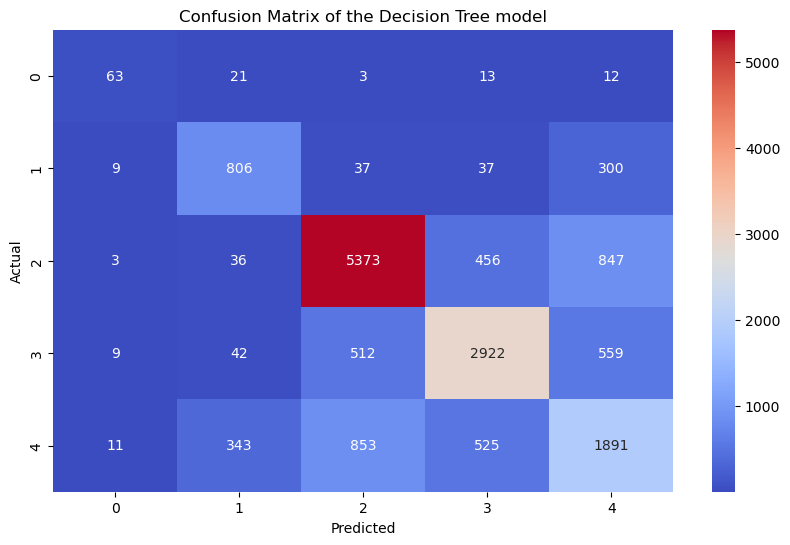

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Define the features and target variable for the decision tree model
X_decisionTree = df_selected[['price', 'carat', 'depth', 'length (mm)', 'width (mm)', 'depth (mm)', 'table (width_at_top)']]
y_decisionTree = df_selected['cut_encoded']

# Split the data into training and testing sets
X_train_decisionTree, X_test_decisionTree, y_train_decisionTree, y_test_decisionTree = train_test_split(X_decisionTree, y_decisionTree, test_size=0.33, random_state=42)

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model
decision_tree_model.fit(X_train_decisionTree, y_train_decisionTree)

# Predict the target variable
y_pred_decisionTree = decision_tree_model.predict(X_test_decisionTree)

# Calculate the accuracy of the model
accuracy_decisionTree = accuracy_score(y_test_decisionTree, y_pred_decisionTree)
print('Accuracy of the Decision Tree model:', accuracy_decisionTree * 100)

# Print the classification report
print('Classification Report of the Decision Tree model:\n', classification_report(y_test_decisionTree, y_pred_decisionTree, zero_division=0))

# Print the confusion matrix
print('Confusion Matrix of the Decision Tree model:\n', confusion_matrix(y_test_decisionTree, y_pred_decisionTree))

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_decisionTree, y_pred_decisionTree), annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix of the Decision Tree model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Hyperparameter Tunining for Decision Tree Model

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.748217886220236
Accuracy of the Best Decision Tree model: 75.15143786265382
Classification Report of the Best Decision Tree model:
               precision    recall  f1-score   support

           0       0.86      0.62      0.73       112
           1       0.77      0.63      0.69      1189
           2       0.82      0.92      0.87      6715
           3       0.68      0.83      0.75      4044
           4       0.67      0.40      0.50      3623

    accuracy                           0.75     15683
   macro avg       0.76      0.68      0.71     15683
weighted avg       0.74      0.75      0.74     15683

Confusion Matrix of the Best Decision Tree model:
 [[  70   13    4   16    9]
 [   8  754   22  140  265]
 [   1    5 6168  322  219]
 [   0    0  463 3352  229]
 [   2  211  878 1090 1442]]


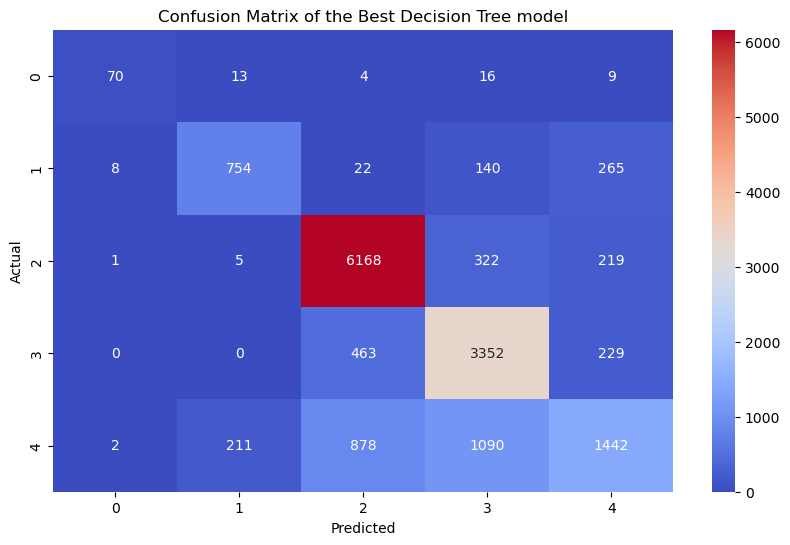

In [18]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV with the Decision Tree model and the parameter grid
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_decisionTree, y_train_decisionTree)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions
best_decision_tree_model = grid_search.best_estimator_
y_pred_best_decisionTree = best_decision_tree_model.predict(X_test_decisionTree)

# Calculate the accuracy of the best model
accuracy_best_decisionTree = accuracy_score(y_test_decisionTree, y_pred_best_decisionTree)
print('Accuracy of the Best Decision Tree model:', accuracy_best_decisionTree * 100)

# Print the classification report
print('Classification Report of the Best Decision Tree model:\n', classification_report(y_test_decisionTree, y_pred_best_decisionTree, zero_division=0))

# Print the confusion matrix
print('Confusion Matrix of the Best Decision Tree model:\n', confusion_matrix(y_test_decisionTree, y_pred_best_decisionTree))

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_decisionTree, y_pred_best_decisionTree), annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix of the Best Decision Tree model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Ensemble Method: RandomForestClassifier

Accuracy of the Random Forest model: 78.03991583243001
Classification Report of the Random Forest model:
               precision    recall  f1-score   support

           0       0.86      0.58      0.69       112
           1       0.77      0.70      0.73      1189
           2       0.82      0.91      0.86      6715
           3       0.78      0.81      0.79      4044
           4       0.68      0.54      0.60      3623

    accuracy                           0.78     15683
   macro avg       0.78      0.71      0.74     15683
weighted avg       0.77      0.78      0.77     15683

Confusion Matrix of the Random Forest model:
 [[  65   21    5   14    7]
 [   7  827   22   45  288]
 [   1    6 6143  250  315]
 [   0    7  463 3261  313]
 [   3  207  861  609 1943]]


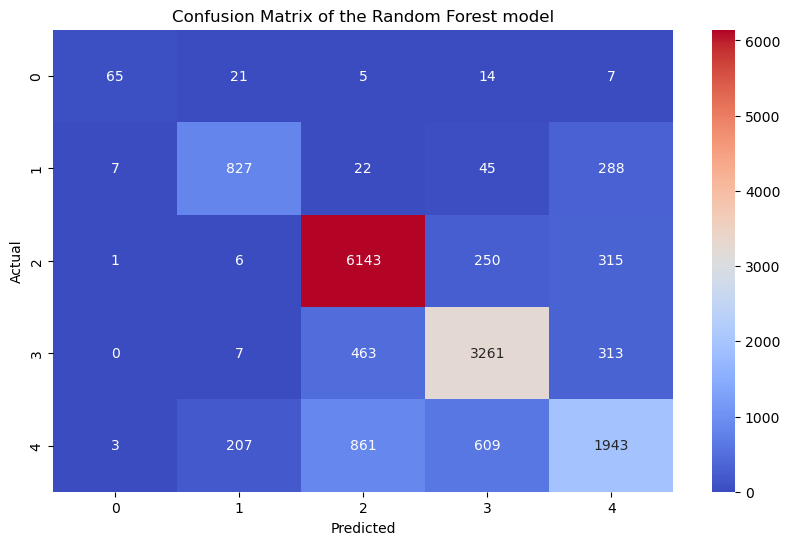

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Define the features and target variable for the KNN model
X_rft = df_selected[['price', 'carat', 'depth', 'length (mm)', 'width (mm)', 'depth (mm)', 'table (width_at_top)']]
y_rft = df_selected['cut_encoded']

# Split the data into training and testing sets
X_train_rft, X_test_rft, y_train_rft, y_test_rft = train_test_split(X_rft, y_rft, test_size=0.33, random_state=42)

# Initialize the RandomForestClassifier
#Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
#Identified using Hyperparameter tuning
random_forest_model = RandomForestClassifier(n_estimators=200, random_state=42, min_samples_leaf=1, min_samples_split=5, bootstrap=True, max_depth=None)

# Fit the model
random_forest_model.fit(X_train_rft, y_train_rft)

# Predict the target variable
y_pred_rft = random_forest_model.predict(X_test_rft)

# Calculate the accuracy of the model
accuracy_random_forest = accuracy_score(y_test_rft, y_pred_rft)
print('Accuracy of the Random Forest model:', accuracy_random_forest * 100)

# Print the classification report
print('Classification Report of the Random Forest model:\n', classification_report(y_test_rft, y_pred_rft))

# Print the confusion matrix
print('Confusion Matrix of the Random Forest model:\n', confusion_matrix(y_test_decisionTree, y_pred_rft))

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_rft, y_pred_rft), annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix of the Random Forest model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


K-Nearest Neighbour

Accuracy of the KNN model: 71.89313269144934
Classification Report of the KNN model:
               precision    recall  f1-score   support

           0       0.76      0.17      0.28       112
           1       0.64      0.58      0.61      1189
           2       0.81      0.92      0.86      6715
           3       0.67      0.77      0.72      4044
           4       0.56      0.35      0.43      3623

    accuracy                           0.72     15683
   macro avg       0.69      0.56      0.58     15683
weighted avg       0.70      0.72      0.70     15683

Confusion Matrix of the KNN model:
 [[  19   67    5   18    3]
 [   6  687   30  114  352]
 [   0   10 6187  297  221]
 [   0   42  481 3120  401]
 [   0  268  980 1113 1262]]


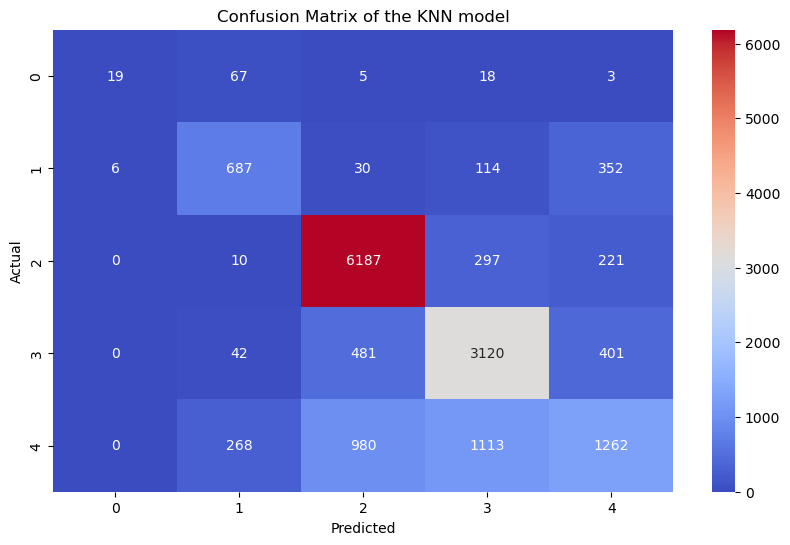

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Define the features and target variable for the KNN model
X_knn = df_selected[['price', 'carat', 'depth', 'length (mm)', 'width (mm)', 'depth (mm)', 'table (width_at_top)']]
y_knn = df_selected['cut_encoded']

# Split the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.33, random_state=42)

# Initialize the KNN model
#Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
#Identified using Hyperparameter tuning
knn_model = KNeighborsClassifier(n_neighbors=11, metric='manhattan', weights='uniform')

# Fit the model
knn_model.fit(X_train_knn, y_train_knn)

# Predict the target variable
y_pred_knn = knn_model.predict(X_test_knn)

# Calculate the accuracy of the model
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print('Accuracy of the KNN model:', accuracy_knn * 100)

# Print the classification report
print('Classification Report of the KNN model:\n', classification_report(y_test_knn, y_pred_knn))

# Print the confusion matrix
print('Confusion Matrix of the KNN model:\n', confusion_matrix(y_test_knn, y_pred_knn))

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_knn, y_pred_knn), annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix of the KNN model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Let's Compare the performance of Each Model used

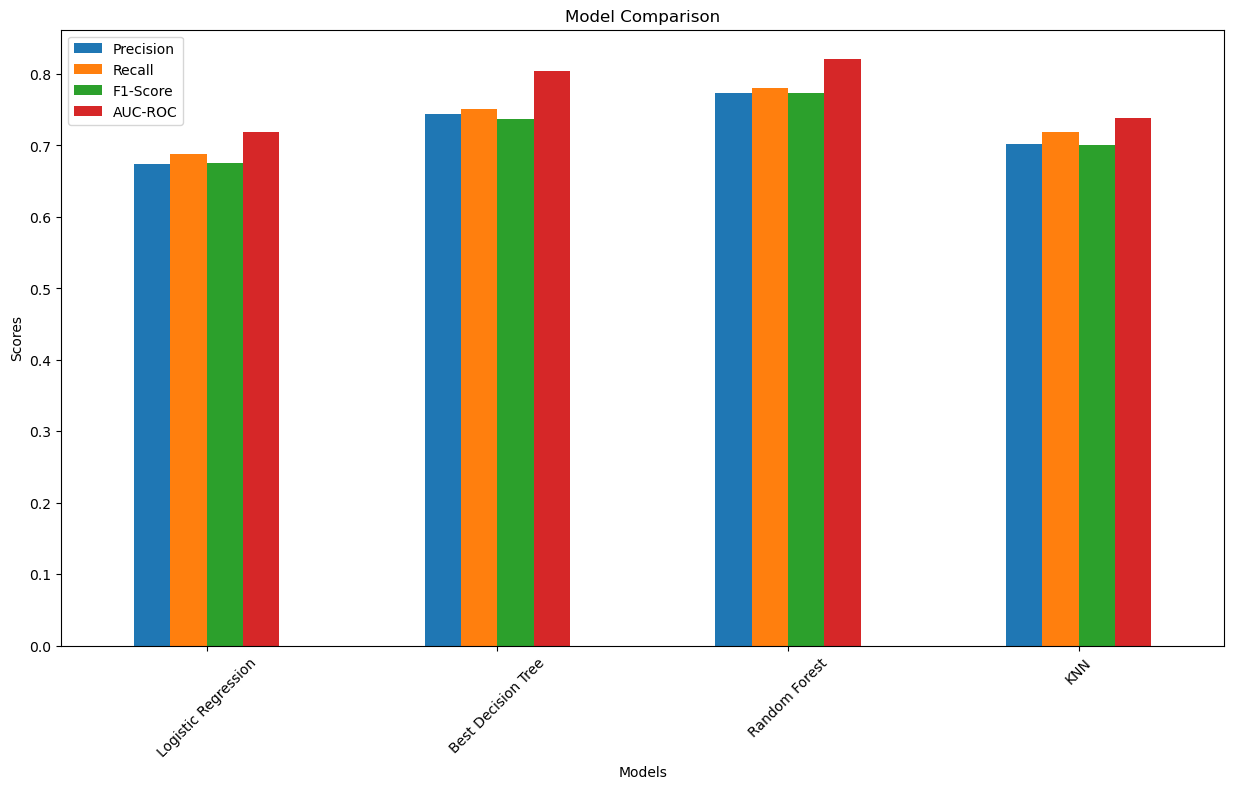

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Calculate evaluation metrics for each model
models = {
    'Logistic Regression': (y_test_logistic, y_pred_logistic),
    'Best Decision Tree': (y_test_decisionTree, y_pred_best_decisionTree),
    'Random Forest': (y_test_rft, y_pred_rft),
    'KNN': (y_test_knn, y_pred_knn)
}

metrics = {
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-Score': f1_score,
    'AUC-ROC': roc_auc_score
}



results = {model: {} for model in models}

for model, (y_true, y_pred) in models.items():
    for metric_name, metric_func in metrics.items():
        if metric_name == 'AUC-ROC':
            # Calculate AUC-ROC for each class and average
            fpr = {}
            tpr = {}
            roc_auc = {}
            for i in range(len(set(y_true))):
                fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred == i)
                roc_auc[i] = auc(fpr[i], tpr[i])
            results[model][metric_name] = sum(roc_auc.values()) / len(roc_auc)
        else:
            results[model][metric_name] = metric_func(y_true, y_pred, average='weighted', zero_division=0)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T

# Plot the comparison chart
results_df.plot(kind='bar', figsize=(15, 8))
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

### Best Model Selection

Based on the evaluation metrics, the Random Forest model is the best model among the ones tested. Here are the reasons:

1. **Accuracy**: The Random Forest model has the highest accuracy of 78.04%, which indicates that it correctly predicts the target variable more often than the other models.

2. **Precision, Recall, and F1-Score**: The Random Forest model also has the highest precision (77.36%), recall (78.04%), and F1-Score (77.36%). These metrics indicate that the model performs well in terms of both precision (minimizing false positives) and recall (minimizing false negatives).

3. **AUC-ROC**: The Random Forest model has the highest AUC-ROC score of 0.821, which indicates that it has a good balance between sensitivity and specificity.

Here is a summary of the evaluation metrics for each model:

| Model               | Precision | Recall | F1-Score | AUC-ROC |
|---------------------|-----------|--------|----------|---------|
| Logistic Regression | 0.674645  | 0.687942 | 0.675773 | 0.719074 |
| Best Decision Tree  | 0.744434  | 0.751514 | 0.736454 | 0.804106 |
| Random Forest       | 0.773626  | 0.780399 | 0.773585 | 0.821001 |
| KNN                 | 0.701502  | 0.718931 | 0.700280 | 0.738125 |

The Random Forest model outperforms the other models in all key metrics, making it the best choice for this dataset.
